# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.134540e+01     7.682089e+00
 * time: 0.005274057388305664
     1     3.038358e+01     5.032960e+00
 * time: 0.024988889694213867
     2     2.246650e+01     6.674140e+00
 * time: 0.04915189743041992
     3     1.960922e+01     7.459092e+00
 * time: 0.1771700382232666
     4     1.299230e+01     3.437555e+00
 * time: 0.20017290115356445
     5     1.026108e+01     1.267169e+00
 * time: 0.22293710708618164
     6     9.493078e+00     1.579248e+00
 * time: 0.2411808967590332
     7     9.150216e+00     1.009191e+00
 * time: 0.25942301750183105
     8     8.933660e+00     1.149413e+00
 * time: 0.27750110626220703
     9     8.747520e+00     9.842818e-01
 * time: 0.29568004608154297
    10     8.594927e+00     8.177513e-01
 * time: 0.3134889602661133
    11     8.482779e+00     6.932759e-01
 * time: 0.3314549922943115
    12     8.435030e+00     6.767565e-01
 * time: 0.34502196311950684
    13     8.371453e+00     5.472114e-01
 * time: 0

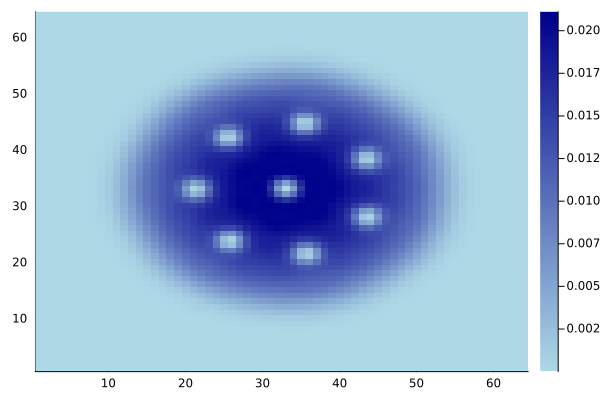

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)